## Imports

In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score,f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt


## Read in cleaned data

In [3]:
df_subreddits = pd.read_csv('/Users/annarutledge/Documents/general_assembly/submissions22/projects/project-3-master/data/subreddits.csv')

In [4]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


## Train - Test - Split

In [5]:
X = df_subreddits[['full_text', 'letter_count', 'word_count']]

y = df_subreddits['subreddit']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

## GradientBoosting Classifier model

In [7]:
cv = CountVectorizer(max_df=0.8, min_df=0, ngram_range=(1,2))

In [8]:
text_vectorizer = make_column_transformer((cv, 'full_text'), remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False)

In [9]:
gb = GradientBoostingClassifier(learning_rate=0.12, max_depth=4, n_estimators=150)

In [10]:
pipe = make_pipeline(text_vectorizer, gb)

In [11]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(max_df=0.8,
                                                                  min_df=0,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'full_text')],
                                   verbose_feature_names_out=False)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.12, max_depth=4,
                                            n_estimators=150))])

In [12]:
pipe.score(X_test, y_test)

0.8321649484536082

In [13]:
preds = pipe.predict(X_test)

In [14]:
pd.DataFrame(preds).value_counts()

crazyideas        2462
showerthoughts    2388
dtype: int64

In [15]:
f1_score(y_test, preds, pos_label='crazyideas')

0.8350222942845561

In [16]:
y_test.value_counts()['crazyideas']

2472

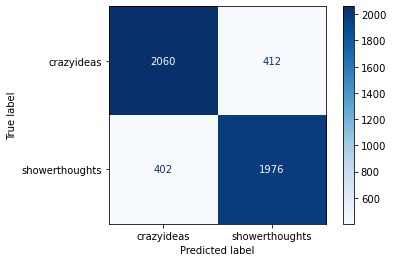

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Blues');

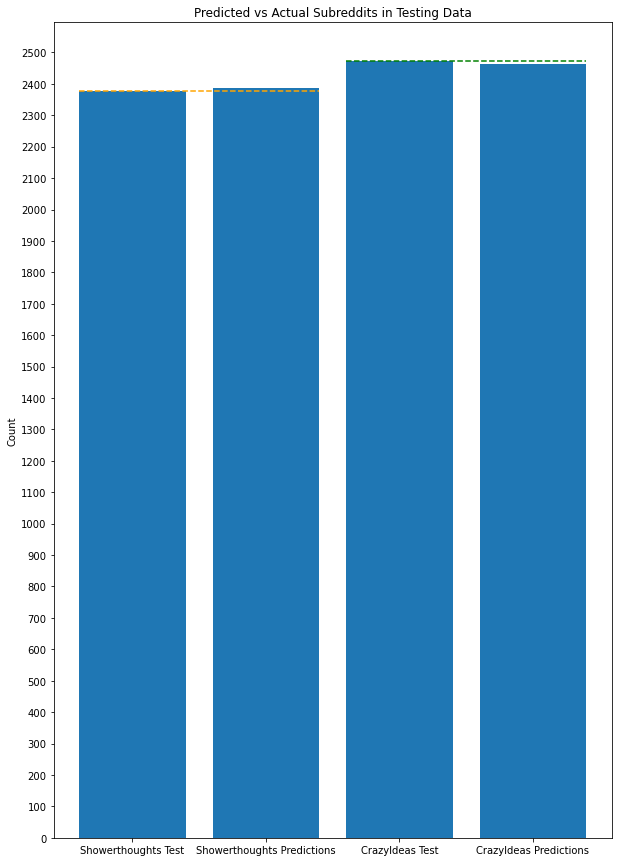

In [23]:
y_showerthoughts = y_test.value_counts()['showerthoughts']
preds_showerthoughts = pd.DataFrame(preds).value_counts()['showerthoughts']
y_crazyideas = y_test.value_counts()['crazyideas']
preds_crazyideas = pd.DataFrame(preds).value_counts()['crazyideas']

plt.figure(figsize=(10,15))
plt.bar(
    x=['Showerthoughts Test', 'Showerthoughts Predictions', 'CrazyIdeas Test', 'CrazyIdeas Predictions'], 
    height=[y_showerthoughts, preds_showerthoughts, y_crazyideas, preds_crazyideas]
    )
plt.yticks(ticks=range(0,2600, 100))
plt.hlines(y=y_showerthoughts, xmin=-0.4, xmax=1.4, colors='orange', linestyles='dashed')
plt.hlines(y=y_crazyideas, xmin=1.6, xmax=3.4, colors='green', linestyles='dashed')
plt.ylabel('Count')
plt.title('Predicted vs Actual Subreddits in Testing Data');